      Rank   $Worldwide  Year  Vote_Count
0        1  546388108.0  2000      6741.0
1        2  460583960.0  2000     19032.0
2        3  429632142.0  2000     11403.0
3        4  374111707.0  2000      3944.0
4        5  349822765.0  2000      2530.0
...    ...          ...   ...         ...
4995   196    7361414.0  2024        30.0
4996   197    7343114.0  2024         4.0
4997   198    7305588.0  2024         0.0
4998   199    7241561.0  2024        70.0
4999   200    7206741.0  2024        23.0

[4830 rows x 4 columns]
{'alpha': 0.1, 'l1_ratio': 0.9}
72151578.17458014


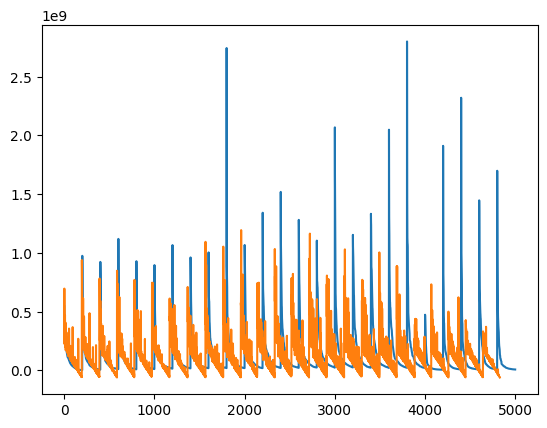

In [41]:
import pandas as pd
from joblib import dump
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

df = pd.read_csv('movies.csv')
df.drop(
    ['Release Group', 'Genres', 'Rating', 'Original_Language', 'Production_Countries', '$Domestic', 'Domestic %', '$Foreign', 'Foreign %'],
    axis = 1,
    inplace = True
)
df.dropna(inplace=True)
print(df)

Y = df['$Worldwide']
# Y = Y.to_numpy().tolist()
X = df.drop('$Worldwide', axis = 1)

# scores = cross_val_score(ElasticNet(fit_intercept = True), X, Y, cv = 8)
# print(scores)

pca = PCA(n_components = 'mle') #decide o melhor número de forma automatizada
pca.fit(X)
X = pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,
random_state=42)

model = GridSearchCV(
    ElasticNet(fit_intercept = True),
    {
    'alpha': list(map(lambda x: x / 10, range(1, 10))),
    'l1_ratio': list(map(lambda x: x / 10, range(1, 10))),
    },
    n_jobs = 4
)

# model = GridSearchCV(
#     tree.DecisionTreeRegressor(random_state=100),
#     {
#         'max_depth' : [3, 5, 10, None],
#         'min_samples_split' : [2, 4],
#         'min_samples_leaf': [ 2, 4],  
#         'max_features': [None]
#     },
#     n_jobs = 4
# )


model.fit(X_train, Y_train)
print(model.best_params_)

model = model.best_estimator_
dump(model, 'model.pkl')


print(mean_absolute_error(Y_test, model.predict(X_test)))


import matplotlib.pyplot as plt

Ypred = model.predict(X)
plt.plot(Y)
plt.plot(Ypred)
plt.show()

wR = []
wP = []
Ymm = []
Ypmm = []

# for i in range(len(Y)):
#     wR.append(Y.iloc[i])
#     wP.append(Ypred[i])
#     if len(wR) > 4:
#         Ymm.append(sum(wR) / 4)
#         Ypmm.append(sum(wP) / 4)
#         wR.pop(0)
#         wP.pop(0)

# plt.plot(Ymm)
# plt.plot(Ypmm)
# plt.show()